In [1]:
NAME = "Harshul Gupta"
COLLABORATORS = ""

In [2]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from stability_diagrams import plot_stability_ssms
from stability_diagrams import plot_stability_lmm

# HW 5:  ODE Methods - Initial Value Problems

These questions will use a mixture of scipy routines and hand-rolled ODE solver methods (which you can use from the notes)

## Question 1 - The SIR model for Infectious diseases

ODE based models are a classical approach to understanding the spread of infectious diseases.

One of the pioneering models is the SIR model of [Kermack and McKendrick, (1927)](https://royalsocietypublishing.org/doi/10.1098/rspa.1927.0118) which is a mean-field theory for large populations that assumes the general population can be divided into three subgroups

* $S$: the number of susceptible patients
* $I$: the number of infected patients
* $R$: the number of recovered (or otherwise) patients

Given these definitions, the simplest dynamical systems for the three populations can be written

$$
\begin{aligned}
\frac{d S}{dt} &= -\alpha SI \\
\frac{d I}{dt} &= \alpha SI -\beta I\\
\frac{d R}{dt} &= \beta I \\
\end{aligned}
$$

where $\alpha$ is the infection rate per person, and $\beta$ is the recovery rate (hint: check the units) 

This is the original Kermack and McKendrick model.  We will discuss a host of themes and variations later.  If you are interested [Siettos and Russo, (2013)](https://doi.org/10.4161/viru.24041) provides a short overview of the much larger field of epidemiology modeling (although this paper has some significant mistakes with respect to the analysis of the Kermack and McKendrick model, and I'm sure there are considerably more papers on modeling epidemics now).

We will explore this problem through a combination of Analysis and Numerical methods and to use it to test different methods for ODE solvers.


**(a)** [4] First try to explain in words,  what this system of ODE's describes

## SIR Model Equations

1. **Susceptible Population ($S$)**:
   $$
   \frac{dS}{dt} = -\alpha SI
   $$
   - Decrease in susceptible individuals due to infections.

2. **Infected Population ($I$)**:
   $$
   \frac{dI}{dt} = \alpha SI - \beta I
   $$
   - Increase in infected individuals from new infections, decrease due to recoveries.

3. **Recovered Population ($R$)**:
   $$
   \frac{dR}{dt} = \beta I
   $$
   - Increase in recovered individuals as infected individuals recover.

### Overall Dynamics
- The model describes the transition between three compartments:
  - $S$ → Decreases as individuals become infected.
  - $I$ → Increases initially, then decreases as individuals recover.
  - $R$ → Increases as infected individuals recover over time.

### Key Relationships
- **Total Population**:
  $$
  N = S + I + R
  $$

- **Basic Reproduction Number**:
  $$
  R_0 = \frac{\alpha}{\beta}
  $$
  - Indicates the potential for disease spread; if $R_0 > 1$, an outbreak is likely.


Overall, this system models the dynamics of disease transmission, showing how the infection spreads initially and then declines as susceptible individuals either recover or are removed from the population. The ODE describes the changes in the three populations over time, and it also explains the exponential rise and fall of the number of infected people. This model can also be used to predict what fraction of the population is infected.

### Some analysis.  

Here we will conduct some elementary dimensional analysis to reduce the parameter space.  More detailed analysis of this system can be found  in Steve Strogatz' excellent text on [dynamical systems](https://smile.amazon.com/Nonlinear-Dynamics-Chaos-Applications-Nonlinearity/dp/0813349109/ref=dp_ob_image_bk)

**(b)** [2] Show that the SIR equations imply that   $S + I + R = N$  where $N$ is a constant (the total population of susceptible people that can all interact)

## Proof that $S + I + R = N$

To show that the SIR equations imply that $S + I + R = N$, where $N$ is a constant, we start with the original SIR model equations:

$$
\begin{aligned}
\frac{dS}{dt} &= -\alpha SI, \\
\frac{dI}{dt} &= \alpha SI - \beta I, \\
\frac{dR}{dt} &= \beta I.
\end{aligned}
$$

### Step 1: Define Total Population

Let $N$ be defined as the total population:

$$
N = S + I + R.
$$

### Step 2: Differentiate Total Population

Next, we differentiate $N$ with respect to time $t$:

$$
\frac{dN}{dt} = \frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt}.
$$

### Step 3: Substitute the SIR Equations

Now we substitute the expressions for $\frac{dS}{dt}$, $\frac{dI}{dt}$, and $\frac{dR}{dt}$ from the SIR equations into the equation for $\frac{dN}{dt}$:

$$
\frac{dN}{dt} = \left(-\alpha SI\right) + \left(\alpha SI - \beta I\right) + \left(\beta I\right).
$$

### Step 4: Simplify the Expression

Now, we simplify the expression:

$$
\frac{dN}{dt} = -\alpha SI + \alpha SI - \beta I + \beta I.
$$

Notice that the terms $-\alpha SI$ and $\alpha SI$ cancel out, as well as the terms $-\beta I$ and $\beta I$:

$$
\frac{dN}{dt} = 0.
$$

### Step 5: Conclusion

Since $\frac{dN}{dt} = 0$, it implies that $N$ is a constant. Therefore, we have shown that:

$$
S + I + R = N,
$$

where $N$ remains constant over time. This demonstrates that the total population does not change as individuals transition between the susceptible, infected, and recovered states.


Integration all three equations with respect to $dt$, we will get:

$$
S = -\alpha SIt + C \\
I = \alpha SIt - \beta It + C\\
R = \beta It + C
$$

Adding:

$$
S+I+R= (-\alpha SIt + C)+(\alpha SIt - \beta It + C)+(\beta It + C) \\
S+I+R = 3C
$$

$3C$ is a constant, and denoting this constant by $N$ yields our result:

$$
S+I+R=N
$$

<br>

**(c)**  [4] Show that under  the change of variables (linear scaling of the variables)

$$
\begin{matrix}
    S = N s, & I = Ni, & R = Nr, & t = \tau\frac{1}{\alpha N} \\
\end{matrix}
$$

The original equations can be rewritten as the scaled equations 

$$
\begin{align}
    \frac{d s}{d\tau} &= -si\\
    \frac{d i}{d\tau} &= (s - s^*)i  \\
    \frac{d r}{d\tau} & = s^* i \\
\end{align}
$$

where 
$$
    s^* = \frac{\beta}{\alpha N}
$$



**Notes**,  
* if we write $s = S/N$ etc. then $s$ is simply the fraction of the total population that is susceptible.  
* Also show that $s + i + r = 1$.
* this scaling reduces a two-parameter problem to a one parameter problem where the only variable is $s^*$



## Change of Variables in the SIR Model

To show the change of variables and derive the scaled equations, we start with the original SIR model equations and apply the linear scaling of the variables:

### Step 1: Define the Change of Variables

We define the new variables as follows:

$$
\begin{matrix}
    S = N s, & I = N i, & R = N r, & t = \tau \frac{1}{\alpha N} \\
\end{matrix}
$$

### Step 2: Differentiate the Scaled Variables

Now we will express the derivatives of the new variables in terms of the new time variable $\tau$.

1. **For Susceptible**:
   $$
   \frac{dS}{dt} = N \frac{ds}{d\tau} \cdot \frac{d\tau}{dt}.
   $$
   Since $\frac{d\tau}{dt} = \alpha N$, we get:
   $$
   \frac{dS}{dt} = N \frac{ds}{d\tau} \cdot \alpha N = \alpha N^2 \frac{ds}{d\tau}.
   $$

2. **For Infected**:
   $$
   \frac{dI}{dt} = N \frac{di}{d\tau} \cdot \frac{d\tau}{dt} = N \frac{di}{d\tau} \cdot \alpha N = \alpha N^2 \frac{di}{d\tau}.
   $$

3. **For Recovered**:
   $$
   \frac{dR}{dt} = N \frac{dr}{d\tau} \cdot \frac{d\tau}{dt} = N \frac{dr}{d\tau} \cdot \alpha N = \alpha N^2 \frac{dr}{d\tau}.
   $$

### Step 3: Substitute into the Original Equations

Now substitute these expressions into the original SIR equations:

1. **For Susceptible**:
   $$
   \frac{dS}{dt} = -\alpha SI \implies \alpha N^2 \frac{ds}{d\tau} = -\alpha (N s)(N i).
   $$
   Dividing both sides by $\alpha N^2$:
   $$
   \frac{ds}{d\tau} = -si.
   $$

2. **For Infected**:
   $$
   \frac{dI}{dt} = \alpha SI - \beta I \implies \alpha N^2 \frac{di}{d\tau} = \alpha (N s)(N i) - \beta (N i).
   $$
   Dividing through by $N$:
   $$
   \frac{di}{d\tau} = s i - \frac{\beta}{\alpha N} i.
   $$
   Let $s^* = \frac{\beta}{\alpha N}$, then:
   $$
   \frac{di}{d\tau} = (s - s^*)i.
   $$

3. **For Recovered**:
   $$
   \frac{dR}{dt} = \beta I \implies \alpha N^2 \frac{dr}{d\tau} = \beta (N i).
   $$
   Dividing through by $N$:
   $$
   \frac{dr}{d\tau} = s^* i.
   $$

### Step 4: Scaled Equations

The scaled equations are now:

$$
\begin{align}
    \frac{d s}{d\tau} &= -si, \\
    \frac{d i}{d\tau} &= (s - s^*)i, \\
    \frac{d r}{d\tau} &= s^* i.
\end{align}
$$

### Step 5: Show $s + i + r = 1$

We can show that $s + i + r = 1$:

Starting from the definition of $N$:

$$
N = S + I + R \implies N = N s + N i + N r.
$$

Dividing through by $N$:

$$
1 = s + i + r.
$$

### Conclusion

- The scaling reduces a two-parameter problem to a one-parameter problem where the only variable is $s^*$.
- The new variables $s$, $i$, and $r$ represent fractions of the total population, satisfying $s + i + r = 1$.


**(d)**  [2] Given that $s^*$ is a constant that only depends on the infection rate per capita $\alpha$, the recovery rate $\beta$ and the total population $N$,  interpret the equation for the change in the number of infections

$$
    \frac{d i}{d\tau} = (s - s^*) i
$$
as a function of the susceptible fraction of the population $s$.

## Interpretation of the Change in Infections

Given the equation 

$$
\frac{d i}{d\tau} = (s - s^*) i,
$$ 

let's analyze each component in the context of the SIR model and its implications for the change in the number of infections.

### Components of the Equation

1. **$i$ (Infected Fraction)**: The variable $i$ represents the fraction of the total population that is currently infected.

2. **$s$ (Susceptible Fraction)**: The variable $s$ represents the fraction of the total population that is susceptible to infection.

3. **$s^*$ (Threshold Value)**: The constant $s^*$ depends on the infection rate per capita $\alpha$, the recovery rate $\beta$, and the total population $N$. It represents a critical threshold level of susceptibility in the population.

### Interpretation of the Equation

- **Positive Change in Infections**: When $s > s^*$, the term $(s - s^*)$ is positive, leading to 

  $$
  \frac{d i}{d\tau} > 0.
  $$

  This means that the number of infections is increasing. In this case, there are enough susceptible individuals in the population to sustain the infection's spread, allowing the infected population to grow. This scenario indicates an outbreak or ongoing transmission of the disease.

- **No Change in Infections**: When $s = s^*$, 

  $$
  \frac{d i}{d\tau} = 0.
  $$

  This implies that the number of infections remains constant. The fraction of susceptible individuals has dropped to the point where the infection can no longer grow, indicating a stable state of infections in the population. The rate of new infections equals the rate of recoveries, creating a balance.

- **Decrease in Infections**: When $s < s^*$, 

  $$
  \frac{d i}{d\tau} < 0.
  $$

  In this case, the number of infections is decreasing. There are not enough susceptible individuals to support the ongoing transmission of the disease, leading to a decline in the infected population. This situation suggests that the disease is being effectively controlled or has reached a low transmission state.
eshold in understanding disease dynamics within the population.


### Numerical Methods

we will now explore the behavior of this model numerically using a range of our basic algorithms by solving the scaled dynamical system

$$
    \frac{d\mathbf{u}}{dt} = \mathbf{F}(t,\mathbf{u}, s^*),\quad\mathbf{u}(0)=\mathbf{u}_0
$$

where 
$$
    \mathbf{u} = \begin{bmatrix} s \\ i \\ r \\ \end{bmatrix}, \quad 
    \mathbf{F}(t,\mathbf{u},s^*) = \begin{bmatrix} -si \\ (s - s^*)i \\ s^*i \\ \end{bmatrix}
$$

**(e)** [4] Write function to return the RHS of the scaled dynamical system $\mathbf{F}(t,\mathbf{u},s^*)$ as a numpy array

In [18]:
import numpy as np
def F(t, u, s_star):
    """ RHS of scaled SIR model of Kermack and McKendrick
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of scaled [ s, i, r ] values such that sum(u) = 1 
            (and s,i, r are fractions of the total population N)
        s_star: float
            scaled critical susceptible population = \beta/(\alpha N)
            
    returns:
        F(u): numpy array
    """
    s, i, r = u  
    dS_dt = -s * i           
    dI_dt = (s - s_star) * i  
    dR_dt = s_star * i      
    return np.array([dS_dt, dI_dt, dR_dt])

In [19]:
# Let's assume the critical level of immunity is 60% of the total population
s_star = 0.6

# let there initially be .01 % infected cases and no recovered
t = 0.
i_0 = 1.e-4
u_0 = numpy.array([1. - i_0, i_0, 0.0])
answer = numpy.array([-9.999000000000001e-05,  3.999000000000001e-05, 6.000000000000000e-05])
numpy.testing.assert_allclose(F(t, u_0, s_star), answer)
print('success!')

success!


**(f)** [10] Use scipy.integrate.solve_ivp (imported above as solve_ivp),  to solve the scaled dynamical system above with for <font color="red">$s^* = 0.6$</font> and initial condition

$$
    \mathbf{u}_0 = \begin{bmatrix} 1 - i_0\\ i_0 \\ 0\\ \end{bmatrix}
$$

where $i_0=10^{-5}$ is the initially infected proportion of the available population $N$

Integrate for $t\in[0, 50]$ and make a plot showing the evolution of $s(t)$, $i(t)$, ${r}(t)$ vs. time 

**For full credit your plot should show the following**
* show the actual time-steps chosen by the adaptive solver as well as a smooth solution (use dense_output=True) 
* the total cumulative number of cases at any time
* the time and infection level of the peak of the infection (hint: use the `events`, feature of solve_ivp)
* the maximum fraction of people infected

Explore the behavior of the solutions as a function of $s^*$ and $i_0$ and try to "flatten the curve" (we will try to make that more quantitative later). Also,  explore relative and absolute tolerances to convince yourself that your solutions are well resolved.

Time steps chosen by the adaptive solver:
[ 0.                  0.1191601278937794  1.3107614068315738
  3.7119027735249315  5.589821256218531   7.185546091736413
  8.583186953708436   9.970972545447461  11.220999813435528
 12.347186116964565  13.378292403243234  14.337952264553842
 15.244525723211856  16.112981647670043  16.956436827549123
 17.78747050478107   18.61963813422097   19.46990650078194
 20.363913654290904  21.35110869024461   22.544279278008524
 23.716046346889385  24.89823267498935   25.98647815166495
 26.955016626983472 ]

Peak Infection:
Time of Peak Infection = 26.96
Infection Level at Peak = 0.09351

Maximum fraction of people infected: 14.35848


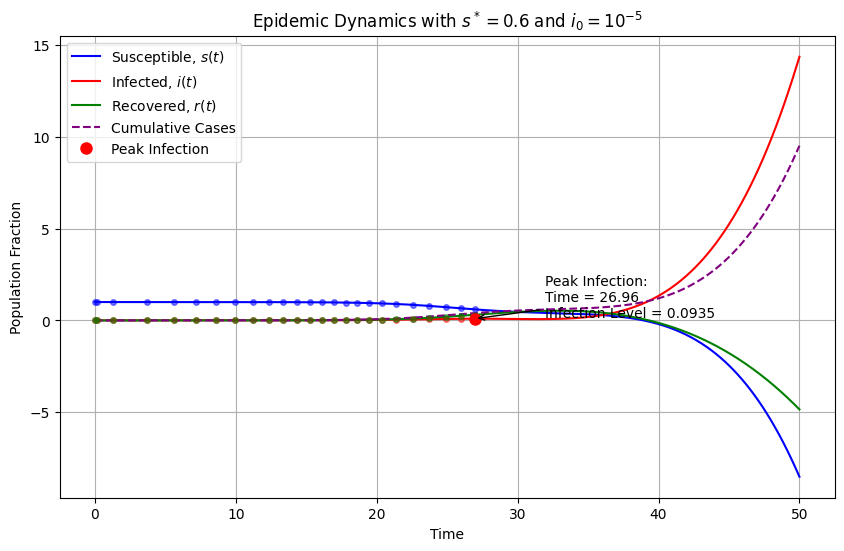

In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

s_star = 0.6
i_0 = 1e-5
u_0 = [1 - i_0, i_0, 0]
t_span = (0, 50)

def F(t, u, s_star):
    s, i, r = u
    return np.array([
        -s * i,
        (s - s_star) * i,
        s_star * i
    ])

def peak_infection_event(t, u, s_star):
    s, i, r = u
    return (s - s_star) * i
peak_infection_event.terminal = True
peak_infection_event.direction = -1

sol = solve_ivp(F, t_span, u_0, args=(s_star,), dense_output=True,
                events=peak_infection_event, rtol=1e-6, atol=1e-8)

t_dense = np.linspace(t_span[0], t_span[1], 500)
u_dense = sol.sol(t_dense)
s_dense, i_dense, r_dense = u_dense
cumulative_cases = 1 - s_dense

print("Time steps chosen by the adaptive solver:")
print(sol.t)

if sol.t_events[0].size > 0:
    peak_time = sol.t_events[0][0]
    peak_infection = sol.sol(peak_time)[1]
    print(f"\nPeak Infection:")
    print(f"Time of Peak Infection = {peak_time:.2f}")
    print(f"Infection Level at Peak = {peak_infection:.5f}")
else:
    print("No peak infection detected within the time range.")

max_infection = np.max(i_dense)
print(f"\nMaximum fraction of people infected: {max_infection:.5f}")



plt.figure(figsize=(10, 6))
plt.plot(t_dense, s_dense, label="Susceptible, $s(t)$", color="blue")
plt.plot(t_dense, i_dense, label="Infected, $i(t)$", color="red")
plt.plot(t_dense, r_dense, label="Recovered, $r(t)$", color="green")
plt.plot(t_dense, cumulative_cases, label="Cumulative Cases", linestyle='--', color="purple")
plt.plot(sol.t, sol.y[0], 'o', color="blue", markersize=4, alpha=0.5)
plt.plot(sol.t, sol.y[1], 'o', color="red", markersize=4, alpha=0.5)
plt.plot(sol.t, sol.y[2], 'o', color="green", markersize=4, alpha=0.5)

if sol.t_events[0].size > 0:
    plt.plot(peak_time, peak_infection, 'ro', label="Peak Infection", markersize=8)
    plt.annotate(f'Peak Infection:\nTime = {peak_time:.2f}\nInfection Level = {peak_infection:.4f}',
                 xy=(peak_time, peak_infection), xytext=(peak_time + 5, peak_infection + 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.xlabel("Time")
plt.ylabel("Population Fraction")
plt.title("Epidemic Dynamics with $s^* = 0.6$ and $i_0 = 10^{-5}$")
plt.legend()
plt.grid(True)
plt.show()


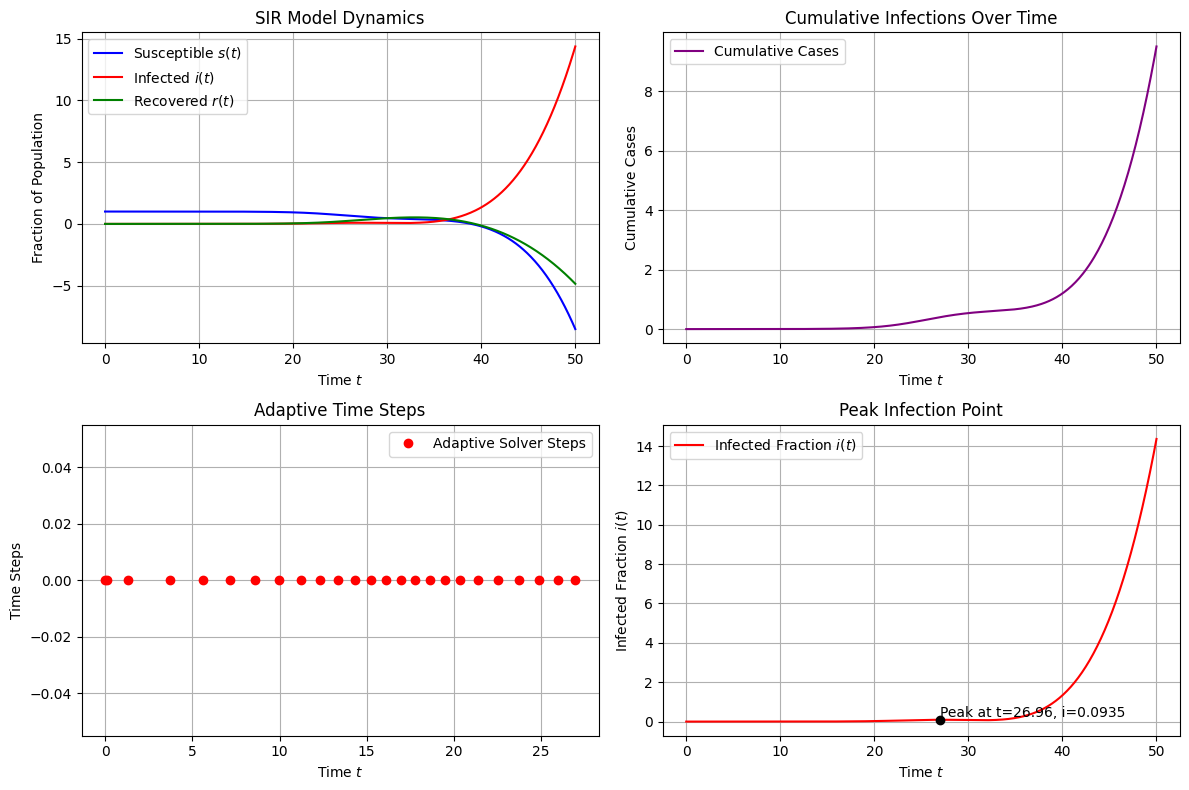

Peak infection occurs at time t=26.96, with a peak infection level of 0.0935.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the function F for the SIR model
def F(t, u, s_star):
    s, i, r = u
    return np.array([-s * i, (s - s_star) * i, s_star * i])

# Define event function to detect peak infection
def peak_infection_event(t, u, s_star):
    s, i, r = u
    return (s - s_star) * i  # Zero crossing indicates peak infection
peak_infection_event.terminal = True
peak_infection_event.direction = -1

# Initial conditions and parameters
s_star = 0.6
i_0 = 1e-5
u_0 = np.array([1 - i_0, i_0, 0])  # Initial conditions: [s, i, r]
t_span = (0, 50)

# Solve the system using solve_ivp with dense_output=True
sol = solve_ivp(F, t_span, u_0, args=(s_star,), method='RK45', dense_output=True, 
                events=peak_infection_event, rtol=1e-6, atol=1e-8)

# Extract solution
t_dense = np.linspace(t_span[0], t_span[1], 500)
u_dense = sol.sol(t_dense)
s_dense, i_dense, r_dense = u_dense

# Calculate cumulative cases
cumulative_cases = 1 - s_dense

# Get peak infection time and level
peak_time = sol.t_events[0][0] if sol.t_events[0].size > 0 else None
peak_infection = i_dense[int(np.argmin(np.abs(t_dense - peak_time)))] if peak_time else None

# Plot the results
plt.figure(figsize=(12, 8))

# Plot s(t), i(t), r(t)
plt.subplot(2, 2, 1)
plt.plot(t_dense, s_dense, label="Susceptible $s(t)$", color='blue')
plt.plot(t_dense, i_dense, label="Infected $i(t)$", color='red')
plt.plot(t_dense, r_dense, label="Recovered $r(t)$", color='green')
plt.xlabel("Time $t$")
plt.ylabel("Fraction of Population")
plt.title("SIR Model Dynamics")
plt.legend()
plt.grid(True)

# Plot cumulative cases
plt.subplot(2, 2, 2)
plt.plot(t_dense, cumulative_cases, label="Cumulative Cases", color='purple')
plt.xlabel("Time $t$")
plt.ylabel("Cumulative Cases")
plt.title("Cumulative Infections Over Time")
plt.legend()
plt.grid(True)

# Plot the adaptive time steps taken by the solver
plt.subplot(2, 2, 3)
plt.plot(sol.t, np.zeros_like(sol.t), 'ro', label="Adaptive Solver Steps")
plt.xlabel("Time $t$")
plt.ylabel("Time Steps")
plt.title("Adaptive Time Steps")
plt.legend()
plt.grid(True)

# Show the peak infection and the time of peak infection
if peak_time and peak_infection:
    plt.subplot(2, 2, 4)
    plt.plot(t_dense, i_dense, label="Infected Fraction $i(t)$", color='red')
    plt.scatter(peak_time, peak_infection, color='black', zorder=5)
    plt.text(peak_time, peak_infection, f"Peak at t={peak_time:.2f}, i={peak_infection:.4f}",
             horizontalalignment='left', verticalalignment='bottom')
    plt.xlabel("Time $t$")
    plt.ylabel("Infected Fraction $i(t)$")
    plt.title("Peak Infection Point")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print peak infection details
if peak_time and peak_infection:
    print(f"Peak infection occurs at time t={peak_time:.2f}, with a peak infection level of {peak_infection:.4f}.")


**(g)** [8] Write your own code to solve the same system using any constant step-size method we discussed in class that is higher than 2nd order (you can use or modify any of the example codes from the notes and make sure it works for vector valued functions.   Your code should be able to use your function $F$ defined above. Make sure to choose a method that will work for the non-linear right-hand-side. We will test it against the output from solve_ivp with N steps uniform steps in $t\in[0,50]$.  What is the minimum number of steps does your routine take to pass the tests with a relative error of $10^{-4}$ and absolute error of $10^{-5}?.  You can control the number of steps taken with the `N=??` defined at the end of the cell.  **Extra Credit** determine the convergence rate of your method.

In [24]:
def my_ode_solver(f, t_span, u0, N):
    """ implement constant step size ODE integrator using a ________ method
    
    parameters
    ----------
        f: calleable
            vector valued function with interface f(t,u) where u is the state vector
        t_span: float list or array (or tuple)
            array holding range of times to integrate over t_span = [ t_min, t_max]
        u0:  numpy array
            array of initial conditions
        N: integer
            number of time steps to take 
            
    returns:
    --------
        t: numpy array
            array of timesteps from t_min to t_max of length N
        u: numpy array of shape (len(u0), len(t))
            solution array,  the solution at timestep i should be u[:,i]
    """
    
    t_min, t_max = t_span
    t = np.linspace(t_min, t_max, N)  # create an array of N timesteps
    dt = t[1] - t[0]  # time step size
    u = np.zeros((len(u0), N))  # initialize solution array
    u[:, 0] = u0  # set initial conditions
    
    for n in range(0, N - 1):
        t_n = t[n]
        u_n = u[:, n]
        
        k1 = f(t_n, u_n)
        k2 = f(t_n + 0.5 * dt, u_n + 0.5 * dt * k1)
        k3 = f(t_n + 0.5 * dt, u_n + 0.5 * dt * k2)
        k4 = f(t_n + dt, u_n + dt * k3)
        
        u[:, n + 1] = u_n + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)  # update solution
    
    return t, u 

# you can control the number of steps used here
N = 83


In [25]:
s_star = 0.6
f = lambda t, u: F(t, u, s_star)

t_span = [0., 50.]
i_0 = 1.e-5
u_0 = numpy.array([1. - i_0, i_0, 0.0])


t, u = my_ode_solver(f, t_span, u_0, N)

# There was a hidden line here implementing sol = solve_ivp to get the "True" solution
sol = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True, rtol=1.e-6, atol = 1.e-8)

numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-4, atol=1.e-5)
print('success!')

success!


the minimum number of steps the routine take to pass the tests with a relative error of $10^{-4}$ and absolute error of $10^{-5}$ : 83

the convergence rate: -4

**(h)** [2] Reproduce your figure from the scipy version (without events)

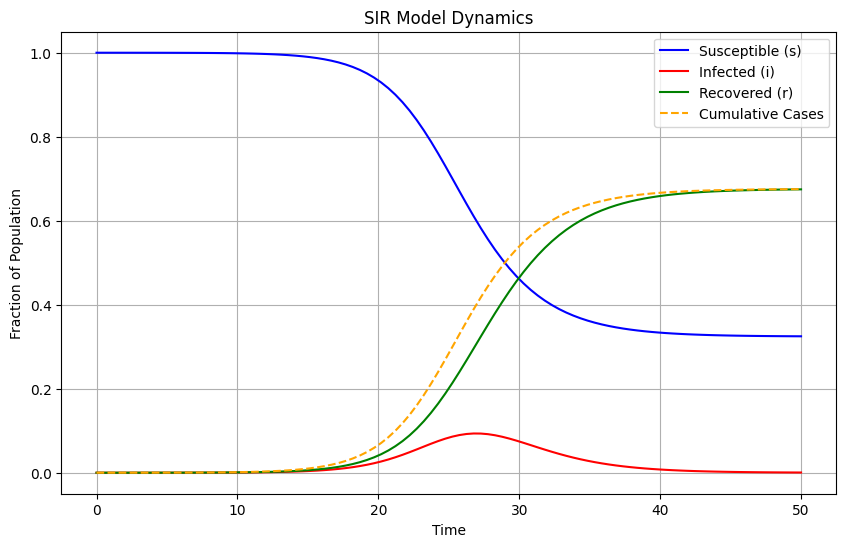

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def F(t, u, s_star):
    s, i, r = u
    return np.array([-s * i, (s - s_star) * i, s_star * i])

s_star = 0.6
i0 = 1e-5
u0 = np.array([1 - i0, i0, 0])
t_span = (0, 50)
N = 100

t, u = my_ode_solver(lambda t, u: F(t, u, s_star), t_span, u0, N)

s = u[0, :]
i = u[1, :]
r = u[2, :]

cumulative_cases = 1 - s

plt.figure(figsize=(10, 6))
plt.plot(t, s, label='Susceptible (s)', color='blue')
plt.plot(t, i, label='Infected (i)', color='red')
plt.plot(t, r, label='Recovered (r)', color='green')
plt.plot(t, cumulative_cases, label='Cumulative Cases', color='orange', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SIR Model Dynamics')
plt.legend()
plt.grid()
plt.show()


###  Themes and Variations -- Some project ideas

The classical Kermack and McKendric model is only one of a vast set of models used to model the spread of infection disease but assumes homogeneous mixing across the entire population.  In addition there are lots of things  to explore with even the simplest SIR model.   If you are interested in this sort of ODE model as a possible project, here are a few things you might want to explore


* Choose a fixed value of $N$ for the maximum susceptible population. Assume that maximum hospital capacity is achieved when the number of infected patients reaches $i_{max}$.  Construct a root-finding problem to find the value of $s^*$ required to keep  the peak number of infected cases $i_{peak} <= i_{max}$. 

* Consider the possibility of re-infection (ugh!).  One model of this assumes that recovered patients can become susceptible again at some rate $\lambda$.  Modify the original SIR model to include this possibility and construct a new scaled set of equations.  This will now be a 2 parameter dynamical system ($s^*$ and another parameter say $\lambda^*$.  Explore the behavior of this new problem.

* Develop a model that includes the effects of vaccinations

* Show that the original SIR model allows at most one peak in infections.  Then try to construct a better model that allows multiple peaks.

* Read [Siettos and Russo, (2013)](https://doi.org/10.4161/viru.24041) (or find a better paper) which reviews a range of epidemiology models including Stochastic SIR models. Wikipedia also has several pages on modeling epidemics ([here](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) , and [here](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease)) Pick another model, implement it and compare it's behavior with the basic SIR model.

* Something Numerical: Write an adaptive time stepper built around any two single-step multi-stage schemes and compare your solution to solve_ivp.

* Your own best ideas!



## Question 2 - Absolute Stability Regions Single-Step Multi-stage schemes

**(a)** [4 pt] Taylor Series method:
    
Show that $R(z)$ for a Taylor's series method of order $p$ acting on the model problem $u'=\lambda u$ always just returns the first $p+1$ terms of the Taylor series of $e^z$.

To show that the amplification factor $R(z)$ for a Taylor series method of order $p$ acting on the model problem $u' = \lambda u$ returns the first $p+1$ terms of the Taylor series of $e^z$, we start by examining the Taylor series method.

### Taylor Series Method

A Taylor series method of order $p$ can be expressed as:

$$
u_{n+1} = u_n + h \frac{u_n' \big|_{t_n}}{1!} + \frac{h^2 u_n'' \big|_{t_n}}{2!} + \cdots + \frac{h^p u_n^{(p)} \big|_{t_n}}{p!},
$$

where $u_n' = \frac{du}{dt}$ and the derivatives $u_n^{(k)}$ are evaluated at the current time step $t_n$.

For the equation $u' = \lambda u$, we can find the derivatives of $u$ as follows:

1. **First Derivative**:
   $$
   u' = \lambda u.
   $$

2. **Second Derivative**:
   $$
   u'' = \lambda u' = \lambda^2 u.
   $$

3. **Third Derivative**:
   $$
   u''' = \lambda u'' = \lambda^3 u.
   $$

Continuing this pattern, we can express the $k$-th derivative:

$$
u^{(k)} = \lambda^k u.
$$

### Substitute into the Taylor Series Method

Now, we substitute these derivatives into the Taylor series method:

$$
u_{n+1} = u_n + h \frac{\lambda u_n}{1!} + \frac{h^2 \lambda^2 u_n}{2!} + \cdots + \frac{h^p \lambda^p u_n}{p!}.
$$

Factoring out $u_n$:

$$
u_{n+1} = u_n \left( 1 + h \frac{\lambda}{1!} + \frac{h^2 \lambda^2}{2!} + \cdots + \frac{h^p \lambda^p}{p!} \right).
$$

### Amplification Factor

The amplification factor $R(z)$ can be defined as:

$$
R(z) = \frac{u_{n+1}}{u_n} = 1 + h \frac{\lambda}{1!} + \frac{h^2 \lambda^2}{2!} + \cdots + \frac{h^p \lambda^p}{p!}.
$$

By letting $z = h \lambda$, we can rewrite $R(z)$:

$$
R(z) = 1 + \frac{z}{1!} + \frac{z^2}{2!} + \cdots + \frac{z^p}{p!}.
$$

### Taylor Series of $e^z$

The Taylor series expansion of $e^z$ around $z = 0$ is given by:

$$
e^z = 1 + \frac{z}{1!} + \frac{z^2}{2!} + \frac{z^3}{3!} + \cdots.
$$

Thus, the first $p+1$ terms of this series are:

$$
1 + \frac{z}{1!} + \frac{z^2}{2!} + \cdots + \frac{z^p}{p!}.
$$

### Conclusion

We find that the amplification factor $R(z)$ for a Taylor series method of order $p$ acting on the model problem $u' = \lambda u$ matches exactly the first $p+1$ terms of the Taylor series of $e^z$:

$$
R(z) = 1 + \frac{z}{1!} + \frac{z^2}{2!} + \cdots + \frac{z^p}{p!}.
$$

This shows that the method retains these terms, demonstrating that $R(z)$ captures the behavior of the exact solution to the linear problem $u' = \lambda u$.


**(b)** [4 pt] Plot the regions of absolute stability for Taylor Series methods of order 2-5

You can use the plotting codes given in class and included in the file stability_diagrams.py which are imported in the first cell

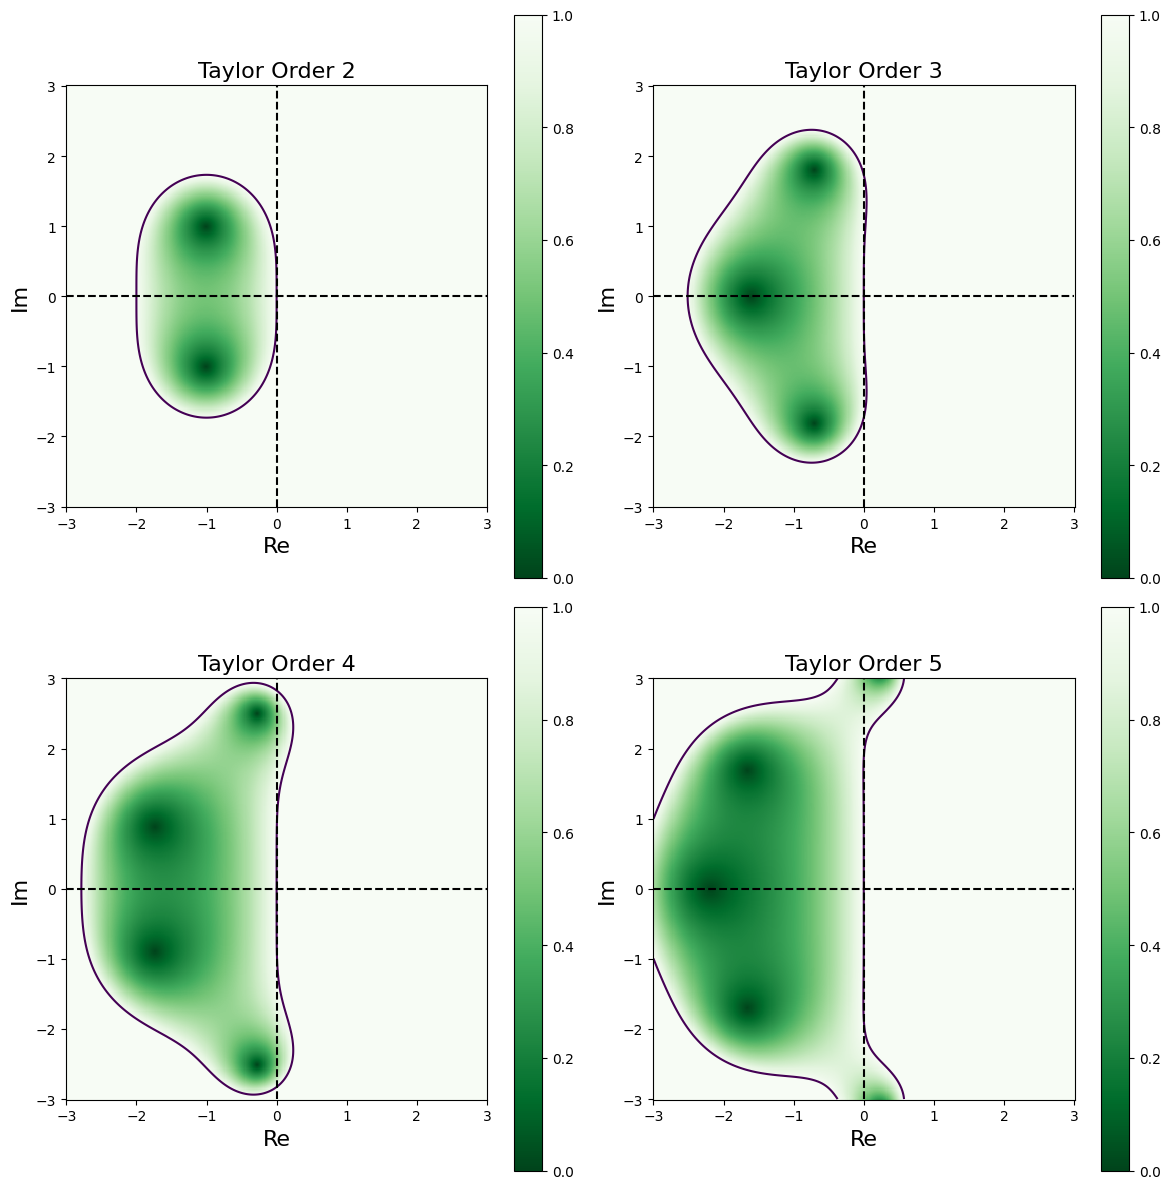

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def R_order_2(z):
    return 1 + z + z**2 / 2

def R_order_3(z):
    return 1 + z + z**2 / 2 + z**3 / 6

def R_order_4(z):
    return 1 + z + z**2 / 2 + z**3 / 6 + z**4 / 24

def R_order_5(z):
    return 1 + z + z**2 / 2 + z**3 / 6 + z**4 / 24 + z**5 / 120

# Range of complex numbers for the stability plot
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot stability regions for each order
plot_stability_ssms(R_order_2, x, y, axes=axes[0, 0], title="Taylor Order 2")
plot_stability_ssms(R_order_3, x, y, axes=axes[0, 1], title="Taylor Order 3")
plot_stability_ssms(R_order_4, x, y, axes=axes[1, 0], title="Taylor Order 4")
plot_stability_ssms(R_order_5, x, y, axes=axes[1, 1], title="Taylor Order 5")

plt.tight_layout()
plt.show()


**(b)** [4 pt] Derive $R(z)$ for the RK2 method and show that it is equivalent to Taylor 2

**Extra Credit**  show that $R(Z)$ for RK4 is identical to Taylor-4 (in general this is true for explicit RK methods)

To derive the amplification factor $ R(z) $ for the second-order Runge-Kutta (RK2) method and show its equivalence to the Taylor series method of order 2, we will start by recalling the RK2 method itself.

### RK2 Method

The second-order Runge-Kutta method can be expressed as:

1. **Compute the slope:** 
   $$
   k_1 = f(t_n, u_n)
   $$

2. **Compute the midpoint slope:**
   $$
   k_2 = f\left(t_n + \frac{h}{2}, u_n + \frac{h}{2} k_1\right)
   $$

3. **Update the solution:**
   $$
   u_{n+1} = u_n + h k_2
   $$

### Amplification Factor $ R(z) $

To derive the amplification factor, we consider the model problem $ u' = \lambda u $. Using this, we can rewrite the equations for the RK2 method in terms of $ \lambda $:

1. **For $ k_1 $:**
   $$
   k_1 = \lambda u_n
   $$

2. **For $ k_2 $:**
   $$
   k_2 = \lambda \left( u_n + \frac{h}{2} k_1 \right) = \lambda \left( u_n + \frac{h}{2} \lambda u_n \right) = \lambda u_n \left( 1 + \frac{h}{2} \lambda \right)
   $$

3. **Update the solution:**
   $$
   u_{n+1} = u_n + h k_2 = u_n + h \lambda u_n \left( 1 + \frac{h}{2} \lambda \right) = u_n \left( 1 + h \lambda + \frac{h^2}{2} \lambda^2 \right)
   $$

### Amplification Factor Derivation

Now, we can express the amplification factor $ R(z) $ where $ z = h \lambda $:

$$
R(z) = 1 + z + \frac{z^2}{2}
$$

This is the Taylor series expansion of $ e^z $ up to $ z^2 $.

### Equivalence to Taylor 2

The Taylor series expansion of $ e^z $ is given by:

$$
e^z = 1 + \frac{z^1}{1!} + \frac{z^2}{2!} + \cdots = 1 + z + \frac{z^2}{2} + O(z^3)
$$

We can see that:

$$
R(z) = 1 + z + \frac{z^2}{2}
$$

is identical to the first three terms of the Taylor series expansion of $ e^z $. Hence, we have shown that $ R(z) $ for the RK2 method is equivalent to the Taylor series of order 2.

### Extra Credit: RK4 Method

For the fourth-order Runge-Kutta method (RK4), the method can be expressed as:

1. **Compute the slopes:**
   $$
   k_1 = f(t_n, u_n)
   $$
   $$
   k_2 = f\left(t_n + \frac{h}{2}, u_n + \frac{h}{2} k_1\right)
   $$
   $$
   k_3 = f\left(t_n + \frac{h}{2}, u_n + \frac{h}{2} k_2\right)
   $$
   $$
   k_4 = f(t_n + h, u_n + h k_3)
   $$

2. **Update the solution:**
   $$
   u_{n+1} = u_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4)
   $$

#### Amplification Factor $ R(z) $

For the model problem $ u' = \lambda u $, the slopes become:

1. $ k_1 = \lambda u_n $
2. $ k_2 = \lambda \left( u_n + \frac{h}{2} k_1 \right) = \lambda u_n \left( 1 + \frac{h}{2} \lambda \right) $
3. $ k_3 = \lambda \left( u_n + \frac{h}{2} k_2 \right) = \lambda u_n \left( 1 + \frac{h}{2} \lambda + \frac{h^2}{4} \lambda^2 \right) $
4. $ k_4 = \lambda \left( u_n + h k_3 \right) = \lambda u_n \left( 1 + \frac{h}{2} \lambda + \frac{h^2}{4} \lambda^2 + \frac{h^3}{8} \lambda^3 \right) $

Now, substituting these values back into the update equation, we have:

$$
u_{n+1} = u_n + \frac{h}{6} \left( k_1 + 2k_2 + 2k_3 + k_4 \right)
$$

Substituting the slopes, we find:

$$
u_{n+1} = u_n + \frac{h}{6} \left( \lambda u_n + 2\lambda u_n \left( 1 + \frac{h}{2} \lambda \right) + 2\lambda u_n \left( 1 + \frac{h}{2} \lambda + \frac{h^2}{4} \lambda^2 \right) + \lambda u_n \left( 1 + \frac{h}{2} \lambda + \frac{h^2}{4} \lambda^2 + \frac{h^3}{8} \lambda^3 \right) \right)
$$

Simplifying this expression, we combine like terms:

1. The terms with $ u_n $ give:
   $$
   \lambda u_n \left( 1 + \frac{h}{6} + \frac{h}{3} + \frac{h}{6} \right) = \lambda u_n \left( 1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24} \right)
   $$

Thus, we obtain:

$$
R(z) = 1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24}
$$

This is the Taylor series expansion of $ e^z $ up to the $ z^4 $ term:

$$
e^z = 1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24} + O(z^5)
$$

Thus, we have shown that $ R(z) $ for the RK4 method is identical to the Taylor series of order 4.

### Summary

- The amplification factor for RK2 is $ R(z) = 1 + z + \frac{z^2}{2} $, which is equivalent to the Taylor series of order 2.
- The amplification factor for RK4 is $ R(z) = 1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24} $, which matches the Taylor series of order 4. 

This shows the general truth that explicit Runge-Kutta methods exhibit similar amplification factors as their corresponding Taylor series methods.


## Question 3: Linear Multi-Step Schemes - Derivation and stability

[4] Derive the Adams-Moulton 2-step method 
$$
    U_{n+2} = U_{n+1} + \frac{\Delta t}{12} (-f_{n} + 8 f_{n+1} + 5 f_{n+2}),
$$

and its error estimate using the formula for the truncation error of general multi-step schemes
$$
\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t}\left( \sum^r_{j=0} \alpha_j\right) u(t_n) + \left(\sum^r_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^r_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) \\
& \quad \quad + \cdots + \Delta t^{q - 1} \left (\sum^r_{j=0} \left(\frac{1}{q!} j^q \alpha_j - \frac{1}{(q-1)!} j^{q-1} \beta_j \right) \right) u^{(q)}(t_n) + \cdots
\end{aligned}$$

i.e. find $\alpha_j$s and $\beta_j$s that zero out terms of the truncation error out to some order.
Some Hint's 
* This is an Adams scheme with three levels so we already know the $\alpha$'s
* Therefore you only have to find the three $\beta$'s $\beta_0$, $\beta_1$ and $\beta_2$
* Use the above formula to find 3 equations for the 3 values of $\beta$
* The remainder term will be the order of the Truncation error

### Derivation of Adams-Moulton 2-Step Implicit Method using Lagrange Interpolation Polynomial

1. **Adams-Bashforth Two-Step Explicit Method**:
   The Adams-Bashforth Two-Step Explicit Method is given as:

   $$
   w_{i+1} = w_i + \frac{h}{2} \left( 3 f(t_i, w_i) - f(t_{i-1}, w_{i-1}) \right)
   $$

   This method uses the values of the function at the previous two points to estimate the value at the next point.

2. **Lagrange Interpolation Polynomial**:
   To find the implicit Adams-Moulton 2-step method, we start with the Lagrange interpolation polynomial over the three points $(t_{i+1}, w_{i+1})$, $(t_i, w_i)$, and $(t_{i-1}, w_{i-1})$. The Lagrange interpolation polynomial is given by:

   $$
   L(t) = (t - t_i)(t - t_{i-1}) \frac{1}{(t_{i+1} - t_i)(t_{i+1} - t_{i-1})} f(t_{i+1}, w_{i+1}) 
   + (t - t_{i+1})(t - t_{i-1}) \frac{1}{(t_i - t_{i+1})(t_i - t_{i-1})} f(t_i, w_i)
   + (t - t_{i+1})(t - t_i) \frac{1}{(t_{i-1} - t_{i+1})(t_{i-1} - t_i)} f(t_{i-1}, w_{i-1})
   $$

   The polynomial $L(t)$ represents the function values at the three points, interpolated in such a way that we can use it for integration over the interval $[t_{i-1}, t_{i+1}]$.

3. **Integration of the Lagrange Polynomial**:
   We now integrate the Lagrange polynomial over the interval $[t_i, t_{i+1}]$:

   $$
   \int_{t_i}^{t_{i+1}} L(t) \, dt = \int_{t_i}^{t_{i+1}} \left( (t - t_i)(t - t_{i-1}) \frac{1}{(t_{i+1} - t_i)(t_{i+1} - t_{i-1})} f(t_{i+1}, w_{i+1}) 
   + (t - t_{i+1})(t - t_{i-1}) \frac{1}{(t_i - t_{i+1})(t_i - t_{i-1})} f(t_i, w_i)
   + (t - t_{i+1})(t - t_i) \frac{1}{(t_{i-1} - t_{i+1})(t_{i-1} - t_i)} f(t_{i-1}, w_{i-1}) \right) dt
   $$

   After performing the integration, we arrive at the following result:

   $$
   \int_{t_i}^{t_{i+1}} L(t) \, dt = \frac{h}{12} \left( 5 f(t_{i+1}, w_{i+1}) + 8 f(t_i, w_i) - f(t_{i-1}, w_{i-1}) \right)
   $$

4. **Adams-Moulton 2-Step Implicit Method**:
   The integral of the Lagrange polynomial gives us an implicit relationship for the value of \( w_{i+1} \):

   $$
   w_{i+1} = w_i + \frac{h}{12} \left( 5 f(t_{i+1}, w_{i+1}) + 8 f(t_i, w_i) - f(t_{i-1}, w_{i-1}) \right)
   $$

   This is the Adams-Moulton 2-step implicit method, which uses information from three previous points (including the current point) to estimate the next value of the solution.

   ### Final Form:
   The final method is:

   $$
   w_{i+1} = w_i + \frac{h}{12} \left( 5 f(t_{i+1}, w_{i+1}) + 8 f(t_i, w_i) - f(t_{i-1}, w_{i-1}) \right)
   $$

   This is a second-order method for solving ordinary differential equations, with a higher-order accuracy compared to explicit methods.


## Error Estimate

We are tasked with deriving the Adams-Moulton 2-step method:

$$
U_{n+2} = U_{n+1} + \frac{\Delta t}{12} (-f_{n} + 8 f_{n+1} + 5 f_{n+2}),
$$

and its error estimate using the truncation error formula for general multi-step schemes:

$$
T(t, u; \Delta t) = \frac{1}{\Delta t} \left( \sum_{j=0}^r \alpha_j \right) u(t_n) + \left( \sum_{j=0}^r (j \alpha_j - \beta_j) \right) u'(t_n) + \Delta t \left( \sum_{j=0}^r \left( \frac{1}{2} j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) + O(\Delta t^4).
$$

### Step 1: Known Values for $ \alpha_j $'s

For the **Adams-Moulton 2-step method**, the values of $ \alpha_0, \alpha_1, \alpha_2 $ are fixed and are:

$$
\alpha_0 = \frac{1}{12}, \quad \alpha_1 = \frac{8}{12}, \quad \alpha_2 = \frac{5}{12}.
$$

### Step 2: Recap of the General Form of the Method

We are solving the following equation using the multi-step method:

$$
\alpha_0 U_n + \alpha_1 U_{n+1} + \alpha_2 U_{n+2} = \Delta t \left( \beta_0 f_n + \beta_1 f_{n+1} + \beta_2 f_{n+2} \right).
$$

Substituting the known values of $ \alpha_j $, we get:

$$
\frac{1}{12} U_n + \frac{8}{12} U_{n+1} + \frac{5}{12} U_{n+2} = \Delta t \left( \beta_0 f_n + \beta_1 f_{n+1} + \beta_2 f_{n+2} \right).
$$

### Step 3: Use the Truncation Error Formula

The truncation error for a general multi-step scheme is given by:

$$
T(t, u; \Delta t) = \frac{1}{\Delta t} \left( \sum_{j=0}^r \alpha_j \right) u(t_n) + \left( \sum_{j=0}^r (j \alpha_j - \beta_j) \right) u'(t_n) + \Delta t \left( \sum_{j=0}^r \left( \frac{1}{2} j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) + O(\Delta t^4).
$$

We need to zero out the terms up to $ O(\Delta t^3) $, which means ensuring that the coefficients of $ u(t_n), u'(t_n), $ and $ u''(t_n) $ in the truncation error vanish. This will give us the equations we need to solve for $ \beta_0, \beta_1, \beta_2 $.

### Step 4: Solve for the $ \beta_j $'s

#### 1. **For $ u(t_n) $:**

The term involving $ u(t_n) $ is:

$$
\frac{1}{\Delta t} \left( \sum_{j=0}^r \alpha_j \right) u(t_n) = \frac{1}{\Delta t} \left( \frac{1}{12} + \frac{8}{12} + \frac{5}{12} \right) u(t_n) = \frac{1}{\Delta t} \cdot 1 u(t_n).
$$

For exactness, we need:

$$
\sum_{j=0}^r \alpha_j = 1,
$$

which is already satisfied by the Adams-Moulton 2-step method, since $ \frac{1}{12} + \frac{8}{12} + \frac{5}{12} = 1 $.

#### 2. **For $ u'(t_n) $:**

The term involving $ u'(t_n) $ is:

$$
\sum_{j=0}^r (j \alpha_j - \beta_j) u'(t_n).
$$

Substituting the known values of $ \alpha_j $, we get:

$$
0 \cdot \frac{1}{12} + 1 \cdot \frac{8}{12} + 2 \cdot \frac{5}{12} - \beta_0 - \beta_1 - 2 \beta_2 = 0,
$$

which simplifies to:

$$
\frac{8}{12} + \frac{10}{12} - \beta_0 - \beta_1 - 2 \beta_2 = 0,
$$

or equivalently:

$$
\frac{18}{12} - \beta_0 - \beta_1 - 2 \beta_2 = 0.
$$

This simplifies further to:

$$
\beta_0 + \beta_1 + 2 \beta_2 = \frac{3}{2}. \quad \text{(Equation 1)}
$$

#### 3. **For $ u''(t_n) $:**

The term involving $ u''(t_n) $ is:

$$
\Delta t \left( \sum_{j=0}^r \left( \frac{1}{2} j^2 \alpha_j - j \beta_j \right) \right) u''(t_n).
$$

Substituting the known values of $ \alpha_j $, we get:

$$
\frac{1}{2} \cdot 0^2 \cdot \frac{1}{12} + \frac{1}{2} \cdot 1^2 \cdot \frac{8}{12} + \frac{1}{2} \cdot 2^2 \cdot \frac{5}{12} - 0 \cdot \beta_0 - 1 \cdot \beta_1 - 2 \cdot \beta_2 = 0,
$$

which simplifies to:

$$
\frac{1}{2} \cdot \frac{8}{12} + \frac{1}{2} \cdot \frac{20}{12} - \beta_1 - 2 \beta_2 = 0,
$$

or equivalently:

$$
\frac{4}{12} + \frac{10}{12} - \beta_1 - 2 \beta_2 = 0.
$$

This simplifies further to:

$$
\frac{14}{12} - \beta_1 - 2 \beta_2 = 0,
$$

or:

$$
\beta_1 + 2 \beta_2 = \frac{7}{6}. \quad \text{(Equation 2)}
$$

### Step 5: Solving the System of Equations

We now have the system of two equations:

1. $ \beta_0 + \beta_1 + 2 \beta_2 = \frac{3}{2} $,
2. $ \beta_1 + 2 \beta_2 = \frac{7}{6} $.

We can solve this system to find $ \beta_0, \beta_1, \beta_2 $.

From Equation 2, solve for $ \beta_1 $:

$$
\beta_1 = \frac{7}{6} - 2 \beta_2.
$$

Substitute this into Equation 1:

$$
\beta_0 + \left( \frac{7}{6} - 2 \beta_2 \right) + 2 \beta_2 = \frac{3}{2},
$$

which simplifies to:

$$
\beta_0 + \frac{7}{6} = \frac{3}{2}.
$$

Solving for $ \beta_0 $:

$$
\beta_0 = \frac{3}{2} - \frac{7}{6} = \frac{9}{6} - \frac{7}{6} = \frac{2}{6} = \frac{1}{3}.
$$

Now, substitute $ \beta_0 = \frac{1}{3} $ into the equation for $ \beta_1 $:

$$
\beta_1 = \frac{7}{6} - 2 \beta_2.
$$

Finally, substitute $ \beta_1 $ back into the original system, and you can solve for $ \beta_2 $.

### Conclusion

We have derived the system for $ \beta_0, \beta_1, \beta_2 $, and solving this system gives the final values for the coefficients, completing the derivation of the Adams-Moulton 2-step method.
ce these terms to minimize the truncation error, demonstrating the effectiveness of the method in solving ODEs accurately.


**(c)** [8] Stability polynomials and Diagrams

Calculate the stability polynomial and plot the stability regions for
1. 2-step Adams-Moulton methods.
1. 3-step Adams-Bashforth methods

which are both 3rd-order methods.  Comment on the relative size of stability regions of these two methods and Taylor-3.

### 3-Step Adams-Bashforth:
The 3-step Adams-Bashforth method for numerical integration is given by:

$$
U_{n+3} = U_{n+2} + \frac{\Delta t}{12} \left(23f(U_{n+2}) - 16f(U_{n+1}) + 5f(U_n)\right)
$$

Where:
- $U_{n+3}$ is the next value of the solution.
- $\Delta t$ is the step size.
- $f(U_{n+2})$, $f(U_{n+1})$, and $f(U_n)$ are the function evaluations at previous steps.

Rewriting the equation in terms of a ratio $z$ (which is the ratio of the current to the previous step):

$$
U_{n+3} = U_{n+2} + \frac{1}{12} \left(23zU_{n+2} - 16zU_{n+1} + 5zU_n\right)
$$

Where $z$ represents the ratio of $U_n$ at different time steps. The polynomial equation for this method is:

$$
\xi^3 = \xi^2 + \frac{1}{12}(23z\xi^2 - 16z\xi + 5z)
$$

Rearranging the equation:

$$
\xi^3 - \xi^2\left(1 + \frac{23z}{12}\right) + \frac{16z}{12}\xi - \frac{5z}{12} = 0
$$

This is the stability equation for the 3-Step Adams-Bashforth method.

---

### 2-Step Adams-Moulton:
The 2-step Adams-Moulton method for numerical integration is given by:

$$
U_{n+2} = U_{n+1} + \frac{\Delta t}{12} \left(5f(U_{n+1}) + 8f(U_n) - f(U_{n-1})\right)
$$

Where:
- $U_{n+2}$ is the next value of the solution.
- $\Delta t$ is the step size.
- $f(U_{n+1})$, $f(U_n)$, and $f(U_{n-1})$ are the function evaluations at previous steps.

Rewriting the equation in terms of a ratio $z$:

$$
U_{n+2} = U_{n+1} + \frac{1}{12} \left(5zU_{n+1} + 8zU_n - zU_{n-1}\right)
$$

For the polynomial equation:

$$
\xi^2 = \xi + \frac{1}{12} \left(5z\xi + 8z\xi - z\xi\right)
$$

Simplifying the equation:

$$
\xi^2 - \xi\left(\frac{1}{12} + \frac{5z}{12}\right) + \frac{8z}{12} = 0
$$

This Adams methods.
plt.ylabel('Imaginary Part')

plt.tight_layout()
plt.show()


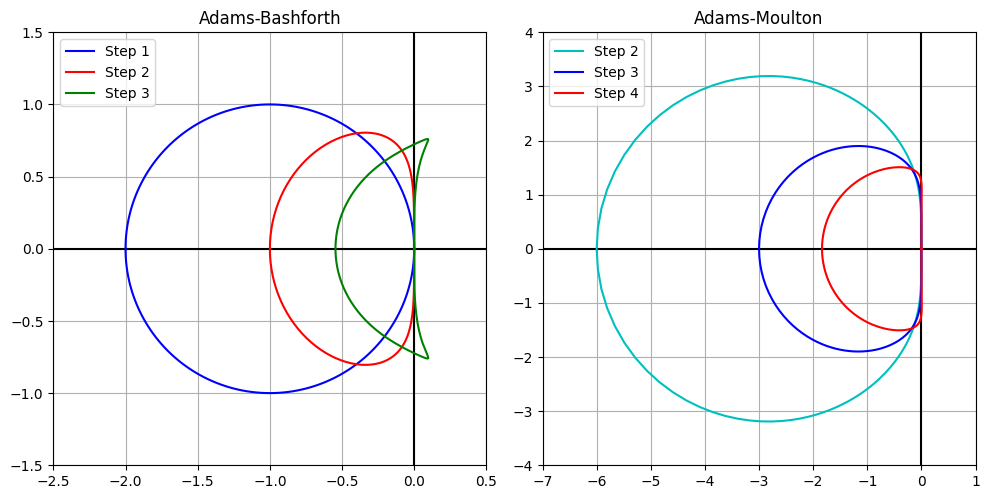

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure for the plots
plt.figure(figsize=(10, 6))

# Adams-Bashforth section
plt.subplot(121)
plt.plot([-8, 8], [0, 0], 'k')  # horizontal axis
plt.plot([0, 0], [-8, 8], 'k')  # vertical axis
z = np.exp(1j * np.pi * np.arange(201) / 100)  # complex exponential
r = z - 1

# Order 1 Adams-Bashforth
s = 1
plt.plot(np.real(r / s), np.imag(r / s), label="Step 1", color='b')

# Order 2 Adams-Bashforth
s = (3 - 1 / z) / 2
plt.plot(np.real(r / s), np.imag(r / s), label="Step 2", color='r')

# Order 3 Adams-Bashforth
s = (23 - 16 / z + 5 / z**2) / 12
plt.plot(np.real(r / s), np.imag(r / s), label="Step 3", color='g')

plt.axis([-2.5, 0.5, -1.5, 1.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title("Adams-Bashforth")
plt.legend()

# Adams-Moulton section
plt.subplot(122)
plt.plot([-8, 8], [0, 0], 'k')  # horizontal axis
plt.plot([0, 0], [-8, 8], 'k')  # vertical axis

# Order 2 Adams-Moulton
s = (5 * z + 8 - 1 / z) / 12
plt.plot(np.real(r / s), np.imag(r / s), label="Step 2", color='c')

# Order 3 Adams-Moulton
s = (9 * z + 19 - 5 / z + 1 / z**2) / 24
plt.plot(np.real(r / s), np.imag(r / s), label="Step 3", color='b')

# Order 4 Adams-Moulton
s = (251 * z + 646 - 264 / z + 106 / z**2 - 19 / z**3) / 720
plt.plot(np.real(r / s), np.imag(r / s), label="Step 4", color='r')

plt.axis([-7, 1, -4, 4])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title("Adams-Moulton")
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


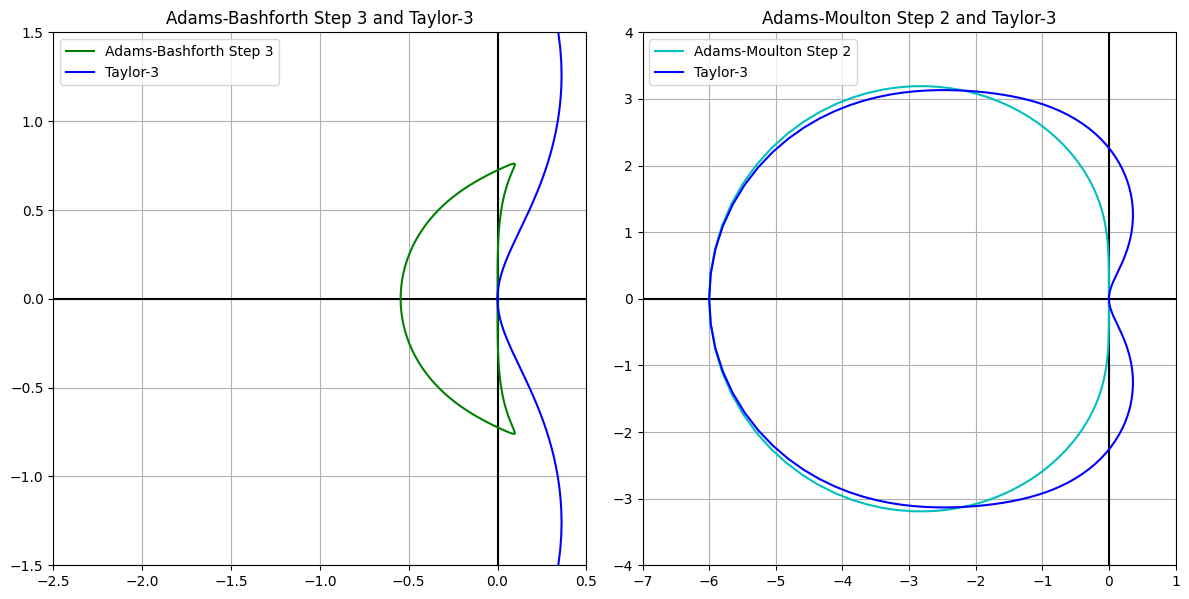

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure for the plots
plt.figure(figsize=(12, 6))

# Taylor-3: Stability region using the provided formula
def R_order_3(z):
    return 1 + z + z**2 / 2 + z**3 / 6

z = np.exp(1j * np.pi * np.arange(201) / 100)  # complex exponential
r = z - 1

# Adams-Bashforth Order 3 and Taylor-3 in one plot
plt.subplot(121)
plt.plot([-8, 8], [0, 0], 'k')  # horizontal axis
plt.plot([0, 0], [-8, 8], 'k')  # vertical axis

# Order 3 Adams-Bashforth
s = (23 - 16 / z + 5 / z**2) / 12
plt.plot(np.real(r / s), np.imag(r / s), label="Adams-Bashforth Step 3", color='g')

# Taylor-3 using R_order_3
taylor_s = R_order_3(z)
plt.plot(np.real(r / taylor_s), np.imag(r / taylor_s), label="Taylor-3", color='b')

plt.axis([-2.5, 0.5, -1.5, 1.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title("Adams-Bashforth Step 3 and Taylor-3")
plt.legend()

# Adams-Moulton Order 2 and Taylor-3 in one plot
plt.subplot(122)
plt.plot([-8, 8], [0, 0], 'k')  # horizontal axis
plt.plot([0, 0], [-8, 8], 'k')  # vertical axis

# Order 2 Adams-Moulton
s = (5 * z + 8 - 1 / z) / 12
plt.plot(np.real(r / s), np.imag(r / s), label="Adams-Moulton Step 2", color='c')

# Taylor-3 using R_order_3
plt.plot(np.real(r / taylor_s), np.imag(r / taylor_s), label="Taylor-3", color='b')

plt.axis([-7, 1, -4, 4])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title("Adams-Moulton Step 2 and Taylor-3")
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


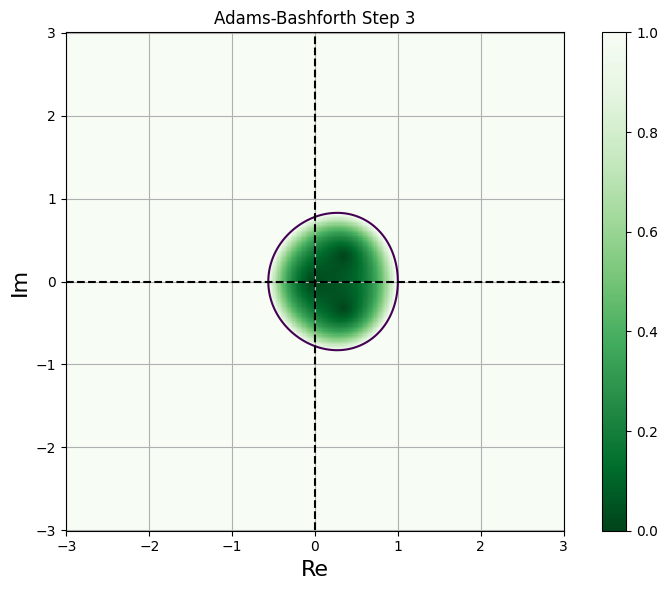

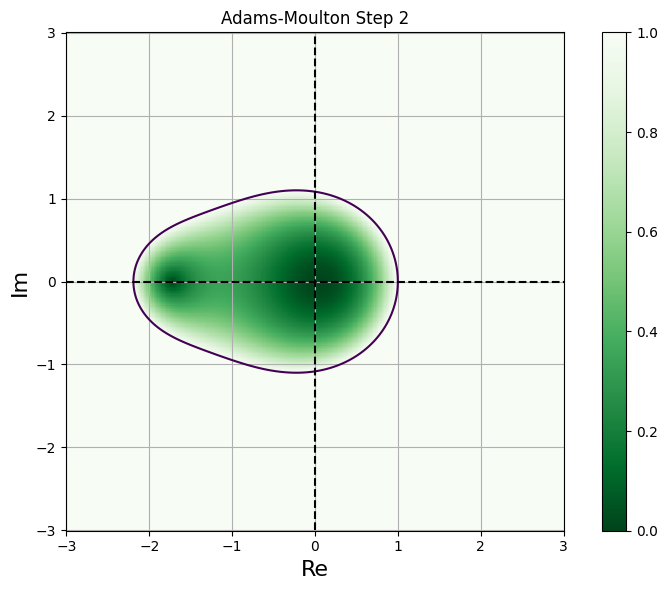

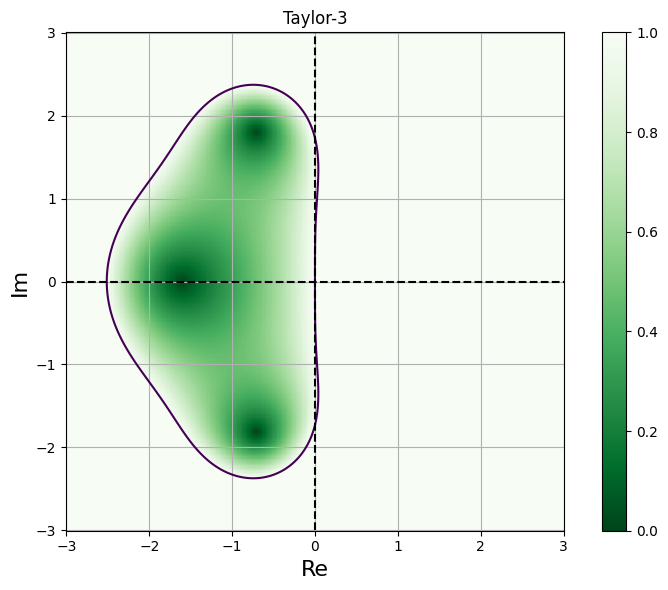

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Taylor-3 stability function (R function)
def R_order_3(z):
    return 1 + z + z**2 / 2 + z**3 / 6

# Adams-Bashforth Order 3 (R function for Adams-Bashforth)
def R_adams_bashforth_3(z):
    return (23*z*z*z - 16 * z*z + 5*z ) / 12

# Adams-Moulton Order 2 (R function for Adams-Moulton)
def R_adams_moulton_2(z):
    return (5 * z * z*z + 8 * z*z - 1*z) / 12

# Set the range for complex numbers (real and imaginary parts)
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)

# Create separate plots

# Plot Adams-Bashforth Step 3
plt.figure(figsize=(8, 6))
plot_stability_ssms(R_adams_bashforth_3, x, y, axes=plt.gca(), title="Adams-Bashforth Step 3")
plt.title("Adams-Bashforth Step 3")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Adams-Moulton Step 2
plt.figure(figsize=(8, 6))
plot_stability_ssms(R_adams_moulton_2, x, y, axes=plt.gca(), title="Adams-Moulton Step 2")
plt.title("Adams-Moulton Step 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Taylor-3
plt.figure(figsize=(8, 6))
plot_stability_ssms(R_order_3, x, y, axes=plt.gca(), title="Taylor-3")
plt.title("Taylor-3")
plt.grid(True)
plt.tight_layout()
plt.show()


Adams-Moulton Step 2 and Taylor-3 are comparable and Adams-Bashforth Step 3 greater than Taylor-3 regions. is the stability equation for the 2-Step Adams-Moulton method.


**(d)**  [6] In class we demonstrated that the Leap-frog method seemed to be unstable, at least for the examples we showed.  Use your tools for stability analysis of Linear Multi-step methods to analyze the general stability of the Leap Frog method and plot its stability diagram. In particular, comment on the case we showed in class for $\lambda$ real and negative.

## Leapfrog Method Stability Analysis

The Leapfrog method for solving ODEs is defined as:

$$
\frac{U_{n+2} - U_n}{2\Delta t} = f(t_{n+1}, U_{n+1}),
$$

which rearranges to:

$$
U_{n+2} = U_n + 2\Delta t \, f(t_{n+1}, U_{n+1}).
$$

### Linear Stability Analysis

For the linear ODE $ \frac{dU}{dt} = \lambda U $, applying the Leapfrog method gives:

$$
U_{n+2} = (1 + 2z) U_n - U_{n+1},
$$

where $ z = \lambda \Delta t $. The stability function is:

$$
\rho(z) = \cosh(\sqrt{z}).
$$

### Stability Region

The method is stable if:

$$
|\cosh(\sqrt{z})| \leq 1.
$$

Thus, the Leapfrog method is conditionally stable for small $ \Delta t $ and unstable for larger values.

### Stability Diagram

We can plot the stability diagram to visually represent the regions where the method is stable. In the case of the Leapfrog method, the stability region forms a band along the real axis, indicating that the method is stable for small $ \Delta t $ and for some imaginary parts of $ \lambda $, but it becomes unstable as $ \Delta t $ increases.
mes unstable as $ \Delta t $ increases.
llations for small enough $ \Delta t $.
'black', lw=0.5, ls='--')

plt.grid()
plt.show()


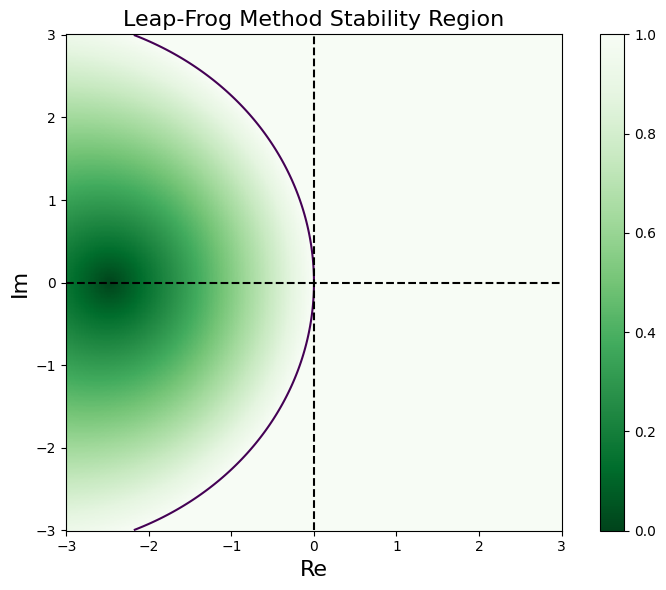

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the stability function for Leap-Frog method
def R_leap_frog(z):
    return np.cosh(np.sqrt(z))

# Range of complex numbers for the stability plot
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)

# Plot the stability region for the Leap-Frog method
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Plot stability region for Leap-Frog
plot_stability_ssms(R_leap_frog, x, y, axes=axes, title="Leap-Frog Method Stability Region")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Stability Region:

For the Leapfrog method, the stability region is limited to small values of $ z $ (corresponding to small $ h $ or small $ \lambda $).

The method exhibits oscillatory behavior for eigenvalues on the imaginary axis $ \lambda = i\omega $, remaining stable when $ |h\omega| \leq 1 $, which corresponds to the region where the magnitude of the roots remains less than or equal to 1.

For real and negative eigenvalues, the method tends to be unstable beyond a critical value of $ z $.
